# 8. 测试感知器

感知器必须经过测试和评估，感知器必须根据真实值进行测试。

- [8.1 加载权重](#1)
- [8.2 测试数据](#2)
- [8.3 调制感知器](#3)

<a name='1'></a>
## 8.1 加载权重

添加一个 load 函数用于权重加载，可以加载之前已经训练过的权重，再便对真实数据进行评测。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class Perceptron:
    def __init__(self, count, lrate = 0.000001) -> None:
        self.input_count = count
        self.learning_rate = lrate
        
        self.bias = 1.0
        self.weights = np.random.sample(count+1)*2 - 1
        
    def __str__(self) -> str:
        return f'Perceptron: {self.bias}|{self.weights}'
    
    def activiate(self, inputs):
        sum = self.weights*inputs
        if sum.sum() > 0:
            return 1
        else:
            return 0

    def train(self, inputs, desired):
        _inputs = inputs
        _inputs.append(self.bias)
        err = desired - self.activiate(np.array(_inputs))
        if err != 0:
            self.weights += self.learning_rate * err * np.array(_inputs)
            
    def load(self, weights):
        self.weights = np.array(weights)

<a name='2'></a>
## 8.2 测试数据

生成新的未知点，导入之前训练得到的权重，然后来检查你的感知器是否能推理出正确的答案，同时添加一个计数器来统计错误的数量：

Text(0.5, 1.0, '3 Errors out of 1000')

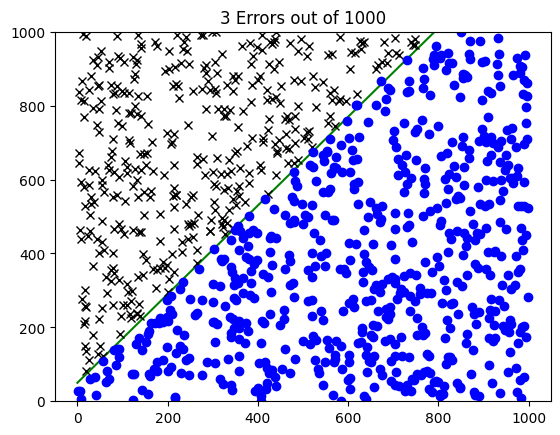

In [10]:
points_count = 1000
error = 0

data = np.random.randint(points_count, size=(2, points_count))

def func(x):
    return 1.2*x + 50

x = np.arange(0, points_count, 1)
y = func(x)
plt.plot(x, y, color='green')
plt.ylim(0, points_count)

p = Perceptron(2)
p.load([-0.01223364, 0.00992285, -0.40154154])

for i in range(points_count):
    # predict
    result = p.activiate(np.array([data[0][i], data[1][i], p.bias]))
    if result == 1:
        plt.plot(data[0][i],data[1][i],'x', color = "black")
    else:
        plt.plot(data[0][i],data[1][i],'o', color = "blue")
    # count the error
    if (data[1][i] > func(data[0][i]) and result == 0) or (data[1][i] < func(data[0][i]) and result == 1):
        error += 1

plt.title(f"{error} Errors out of {points_count}")

<a name='3'></a>
## 8.3 调整感知器

如何调整感知器？
以下是一些建议：

- 调整学习率
- 增加训练数据的数量
- 增加训练迭代次数